# MIDTERM PROJECT 
## SEAN YOO iy391 
## Victor Lu vl1189

In [1]:
import pandas as pd
import numpy as np
import os
import plotnine
from plotnine import *
%matplotlib inline

In [2]:
url= "/Users/seanyoo/Desktop/fba_dataset.csv"
df = pd.read_csv(url)
df.columns = [var.capitalize() for var in df.columns]
df.head()

,S.no,Name,Nationality,Current rank,Previous year rank,Sport,Year,Earnings ($ million)
0,1,Mike Tyson,USA,1,NaN,boxing,1990,28.6
1,2,Buster Douglas,USA,2,NaN,boxing,1990,26.0
2,3,Sugar Ray Leonard,USA,3,NaN,boxing,1990,13.0
3,4,Ayrton Senna,Brazil,4,NaN,auto racing,1990,10.0
4,5,Alain Prost,France,5,NaN,auto racing,1990,9.0


### Comments 
- We capitalized the column names so it would be easier for us to recall the columns

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   S.no                  301 non-null    int64  
 1   Name                  301 non-null    object 
 2   Nationality           301 non-null    object 
 3   Current rank          301 non-null    int64  
 4   Previous year rank    277 non-null    object 
 5   Sport                 301 non-null    object 
 6   Year                  301 non-null    int64  
 7   Earnings ($ million)  301 non-null    float64
dtypes: float64(1), int64(3), object(4)
memory usage: 18.9+ KB


In [4]:
df["Sport"].unique()

array(['boxing', 'auto racing', 'golf', 'basketball', 'Basketball',
       'Boxing', 'Auto Racing', 'Golf', 'Tennis', 'NFL', 'Auto racing',
       'NBA', 'Baseball', 'Ice Hockey', 'American Football / Baseball',
       'tennis', 'ice hockey', 'F1 Motorsports', 'NASCAR', 'Hockey',
       'Auto Racing (Nascar)', 'F1 racing', 'American Football', 'soccer',
       'baseball', 'cycling', 'motorcycle gp', 'Soccer', 'MMA'],
      dtype=object)

In [5]:
df["Sport"] = df["Sport"].str.upper()
df["Sport"].unique()

array(['BOXING', 'AUTO RACING', 'GOLF', 'BASKETBALL', 'TENNIS', 'NFL',
       'NBA', 'BASEBALL', 'ICE HOCKEY', 'AMERICAN FOOTBALL / BASEBALL',
       'F1 MOTORSPORTS', 'NASCAR', 'HOCKEY', 'AUTO RACING (NASCAR)',
       'F1 RACING', 'AMERICAN FOOTBALL', 'SOCCER', 'CYCLING',
       'MOTORCYCLE GP', 'MMA'], dtype=object)

### Comment 
- We realized that some of the sport names were lowercased while others were uppercased. Therefore, we decided to put all the sports into uppercase, so we know it is the same categories

In [6]:
df["Year"].unique()

array([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020])

### Comment
- We realized that our dataset was missing the year 2001

In [7]:
df["Name"].unique()
df["Name"] = df["Name"].replace("Shaquille O'Neal", "Shaq O'Neal")

### Comment
- Shaquille O'Neal and Shaq are the same player, so we made them both Shaq. 

### SECTION A: 

#### Top paid athlete from 1990 to 2000 and 2002 to 2020. We would grou each of the athlete by "Name" and and then sun their earning throughout the years

In [8]:
df["Earnings ($ million)"] = df["Earnings ($ million)"].astype(float)
h_paid_df = df.groupby(["Name"]).sum().reset_index()

In [9]:
h_paid_df = h_paid_df .sort_values(by=['Earnings ($ million)'], ascending= False)
h_paid_df[["Name", "Earnings ($ million)"]].head(10)

,Name,Earnings ($ million)
77,Tiger Woods,1373.8
45,LeBron James,844.8
25,Floyd Mayweather,840.0
14,Cristiano Ronaldo,787.1
68,Roger Federer,781.1
52,Michael Jordan,738.8
48,Lionel Messi,715.5
54,Michael Schumacher,639.0
43,Kobe Bryant,601.1
65,Phil Mickelson,519.9


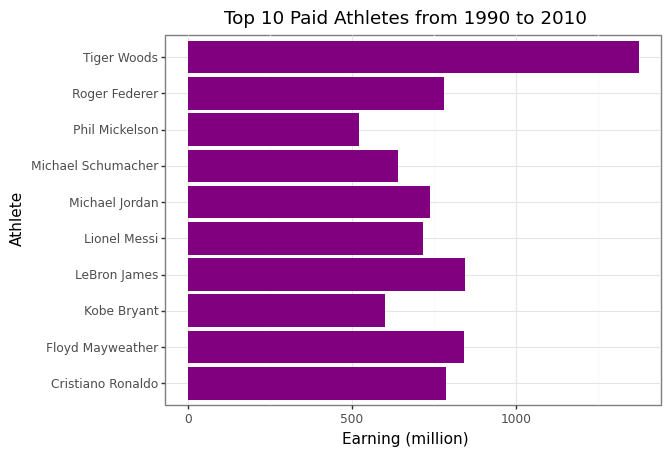

<ggplot: (8791208038952)>

In [10]:
(ggplot(data=h_paid_df.iloc[0:10,], mapping=aes(x='Name', y='Earnings ($ million)'))+
geom_bar(stat='identity',fill= "purple") + coord_flip() +
xlab("Athlete")+
ylab("Earning (million)")+
ggtitle("Top 10 Paid Athletes from 1990 to 2010") + 
theme_bw()
)

Analysis: We have a bar graph to visualize which athlete throughout 1990 to 2010 earned the most amount of money. The bar graph allows us to compare how Tiger Woods earned way more than his closest competitor, Lebron James. 

### Section B: 

#### Who were the top 10 highest paid athlete for basketball from year 1990 to 2020. We realized that the Top 20 paid players were all basketball players, so we ranked them only among basketball players.

In [11]:
df_basket = df.loc[(df["Sport"] == "BASKETBALL")]
df_basket["Earnings ($ million)"] = df_basket["Earnings ($ million)"].astype(float)
df_basket= df_basket.groupby(["Name"]).sum().reset_index()
df_basket = df_basket .sort_values(by=['Earnings ($ million)'], ascending= False)
df_basket[["Name", "Earnings ($ million)"]].head(10)

/var/folders/ng/44x5jng1501210_z7y7z7rrh0000gn/T/ipykernel_17382/3471131241.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Name,Earnings ($ million)
6,LeBron James,844.8
7,Michael Jordan,738.8
5,Kobe Bryant,601.1
9,Shaq O'Neal,325.2
3,Kevin Durant,300.3
10,Stephen Curry,278.4
1,Grant Hill,137.1
4,Kevin Garnett,101.7
2,James Harden,46.6
8,Patrick Ewing,31.2


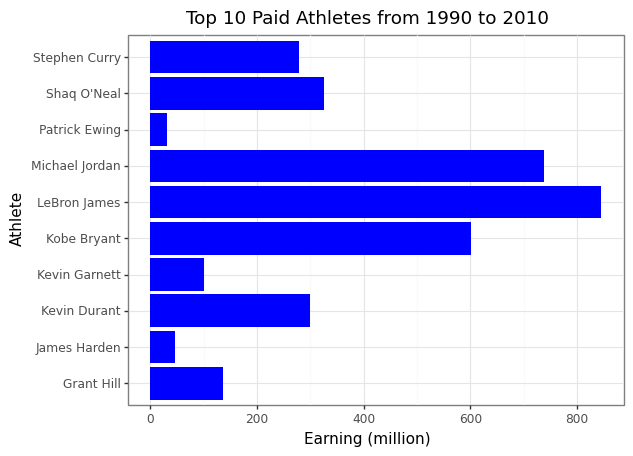

<ggplot: (8791208133485)>

In [12]:
(ggplot(data=df_basket.iloc[0:10,], mapping=aes(x='Name', y='Earnings ($ million)'))+
geom_bar(stat='identity',fill='blue') + coord_flip() +
xlab("Athlete")+
ylab("Earning (million)")+
ggtitle("Top 10 Paid Athletes from 1990 to 2010") + 
theme_bw()
)

Analysis: Similiar to the previous question, we grouped the athlete by name, and added up their salaries throughout the years. We had to filter the data in the begninning, so that we would only compare basektball players. 

### Section C: 

#### Who was ranked number one the most frequently from year 1990 to year 2020. We want to count how many times an athlete was ranked number one paid player for each year from 1990 to 2020.

In [13]:
df.loc[df["Current rank"] ==1, "rank_one"] = "yes"
df.loc[df["Current rank"] !=1, "rank_one"] = "no"
df_items = df.loc[df["rank_one"].str.contains("yes")]
rank = pd.DataFrame(df_items.groupby("Name")["rank_one"].count())
rank = rank.rename_axis("name").reset_index()
rank.columns = [var.capitalize() for var in rank.columns]
rank = rank .sort_values(by=["Rank_one"], ascending= False)
rank[["Name", "Rank_one"]].head(10)

,Name,Rank_one
8,Tiger Woods,11
4,Michael Jordan,6
2,Floyd Mayweather,4
0,Cristiano Ronaldo,2
5,Michael Schumacher,2
6,Mike Tyson,2
1,Evander Holyfield,1
3,Lionel Messi,1
7,Roger Federer,1


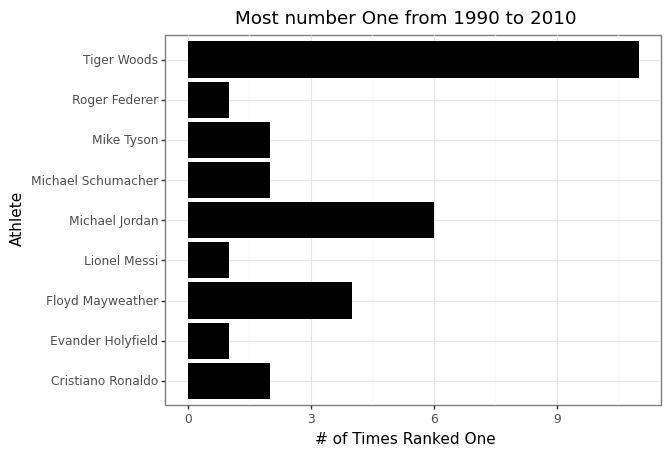

<ggplot: (8791208240186)>

In [14]:
(ggplot(data=rank, mapping=aes(x="Name", y="Rank_one"))+
geom_bar(stat='identity',fill='black') + coord_flip() +
xlab("Athlete")+
ylab("# of Times Ranked One")+
ggtitle("Most number One from 1990 to 2010") + 
theme_bw()
)

Analysis: We decided to make a new column named rank_one, and then we would assign "yes" if the player was ranked one. Then we would group each athlete and count how many times they got rank one. Also, the new dataframe didn't read the column name, so we restarted it and named it again. 

# Section D 

Compare the growth rate of the top 10 earners to inflation rates to see the impact inflation plays on earnings.

In [15]:
df2 = df.groupby(['Year']).sum().groupby(level=0).max()
df2.head()

,S.no,Current rank,Earnings ($ million)
Year,,,
1990,55,52,128.0
1991,155,55,183.5
1992,255,55,158.7
1993,355,55,178.3
1994,455,54,148.9


In [16]:
Earnings_year = df2.drop(columns=['S.no', 'Current rank'])
Earnings_year.head()

,Earnings ($ million)
Year,
1990,128.0
1991,183.5
1992,158.7
1993,178.3
1994,148.9


In [17]:
PCT = Earnings_year.pct_change()
Years = ['1990','1991','1992','1993','1994','1995','1996','1997','1998','1999','2000','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020']
df3 = PCT.assign(Year=Years)
Inflation = [0.054,0.0424,0.0303,0.0295,0.0261,0.0281,0.0293,0.0234,0.0155,0.0219,0.0338,0.0283,0.0227,0.0268,0.0339,0.0323,0.0285,0.0384,-0.0036,0.0164,0.0316,0.0207,0.0146,0.0162,0.0012,0.0126,0.0213,0.0244,0.0181,0.0123]
df4 = df3.assign(Inflation=Inflation)
df4.columns = ['Change in Earnings','Year','Inflation']
df4.head()

,Change in Earnings,Year,Inflation
Year,,,
1990,NaN,1990,0.0540
1991,0.433594,1991,0.0424
1992,-0.135150,1992,0.0303
1993,0.123503,1993,0.0295
1994,-0.164891,1994,0.0261


<AxesSubplot:title={'center':'Comparison of Earnings and Inflation'}, xlabel='Year'>

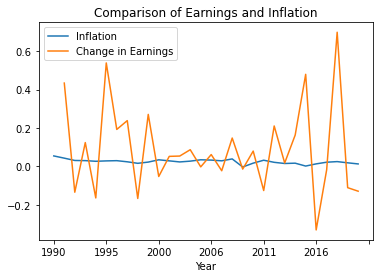

In [18]:
df4.plot(x="Year", y=['Inflation','Change in Earnings'],title='Comparison of Earnings and Inflation')

Analysis: As we can see from the graph the growth rate of earnings is not only more volatile but also more extreme than inflation rates. Inflation might raise the price of goods and services in the economy but in comparison with Forbes Richest Athletes, inflation has little to no affect on their earnings. 


# Analysis 

Question 1: Which sport pays their athletes the most

In [19]:
t_mean = pd.DataFrame(df_items.groupby("Sport")["Earnings ($ million)"].mean())
t_mean.columns = [var.capitalize() for var in t_mean.columns]
t_mean = t_mean.rename_axis("Sport").reset_index()
t_mean = t_mean .sort_values(by=["Earnings ($ million)"], ascending= False)
t_mean[["Sport", "Earnings ($ million)"]].head(10)

,Sport,Earnings ($ million)
2,BOXING,134.157143
5,TENNIS,106.300000
4,SOCCER,102.666667
3,GOLF,89.763636
0,AUTO RACING,54.000000
1,BASKETBALL,48.850000


 Question 2: Which country has highing paid athletes

In [20]:
t_mean = pd.DataFrame(df_items.groupby("Nationality")["Earnings ($ million)"].mean())
t_mean.columns = [var.capitalize() for var in t_mean.columns]
t_mean = t_mean.rename_axis("Nationality").reset_index()
t_mean = t_mean .sort_values(by=["Earnings ($ million)"], ascending= False)
t_mean[["Nationality", "Earnings ($ million)"]].head(10)

,Nationality,Earnings ($ million)
0,Argentina,127.000000
3,Switzerland,106.300000
4,USA,92.483333
2,Portugal,90.500000
1,Germany,54.000000


Question 3 : How dominant are athletes of USA nationality? How often are they top 3 earners compared to other nationalities?

In [21]:
df7 = df.assign(count=1)
df7["Sport"] = df7["Sport"].str.upper()

In [22]:
Top3 = df7[(df["Current rank"] != 10)&(df7["Current rank"]  != 9)&(df7["Current rank"]  != 8)&(df7["Current rank"]  != 7)&(df7["Current rank"]  != 6)&(df7["Current rank"]  != 5)&(df7["Current rank"] != 4)]
Top3

,S.no,Name,Nationality,Current rank,Previous year rank,Sport,Year,Earnings ($ million),rank_one,count
0,1,Mike Tyson,USA,1,NaN,BOXING,1990,28.6,yes,1
1,2,Buster Douglas,USA,2,NaN,BOXING,1990,26.0,no,1
2,3,Sugar Ray Leonard,USA,3,NaN,BOXING,1990,13.0,no,1
10,11,Evander Holyfield,USA,1,8,BOXING,1991,60.5,yes,1
11,12,Mike Tyson,USA,2,1,BOXING,1991,31.5,no,1
...,...,...,...,...,...,...,...,...,...,...
282,283,Cristiano Ronaldo,Portugal,2,3,SOCCER,2019,109.0,no,1
283,284,Neymar,Brazil,3,5,SOCCER,2019,105.0,no,1
291,292,Roger Federer,Switzerland,1,5,TENNIS,2020,106.3,yes,1
292,293,Cristiano Ronaldo,Portugal,2,2,SOCCER,2020,105.0,no,1


In [23]:

NationT3 = Top3.groupby('Nationality').count().drop(columns=['Current rank','S.no', 'Name','Previous year rank','Sport','Year','Earnings ($ million)', "rank_one"])
NationT3


,count
Nationality,
Argentina,5
Brazil,3
Filipino,1
Finland,1
Germany,9
Philippines,1
Portugal,7
Russia,1
Switzerland,2


Analysis: Athletes with American nationality are extremely dominant in earnings. Over the past 30 years, they reach the top 3 61 times while the next closest nationality (Germany) only managed to reach the top 3 9 times. Other countries have very few athletes breaking the top 3 earnings mark. 

Question 4: Knowing that the US nationality has dominated the charts of the Forbes Richest Athletes list, what specific sports is the US most dominant in? 

In [24]:
Sports = df7.groupby('Sport').count().drop(columns=['S.no', 'Name','Previous year rank','Current rank','Year','Earnings ($ million)','Nationality', "rank_one"])
Sports


,count
Sport,
AMERICAN FOOTBALL,17
AMERICAN FOOTBALL / BASEBALL,1
AUTO RACING,18
AUTO RACING (NASCAR),2
BASEBALL,6
BASKETBALL,81
BOXING,46
CYCLING,1
F1 MOTORSPORTS,5


In [25]:
NoUS_Sports = df7[(df7.Nationality != 'USA')]
NoUS_SportsF = NoUS_Sports.groupby('Sport').count().drop(columns=['S.no', 'Name','Previous year rank','Current rank','Year','Earnings ($ million)',"Nationality", "rank_one"])
NoUS_SportsF 

,count
Sport,
AUTO RACING,17
BASEBALL,1
BOXING,6
F1 MOTORSPORTS,5
F1 RACING,8
GOLF,2
HOCKEY,1
ICE HOCKEY,3
MMA,1


Analysis: Athletes of US nationality tend to excel in golf, boxing, and basketball. US athletes make up a majority of the sport's top earners. Interestingly though, athletes of US nationality never are top earners in the sport of soccer. Even though US athletes are lacking in soccer they definitely dominant in other sports. 

Question 5: How has the prevalence of sports evolved since 1990? Compare the earnings of sports prior to 2005 and after 2005

In [26]:
Sports2005P = df7[(df.Year != 2020)&(df7.Year != 2019)&(df7.Year != 2018)&(df7.Year != 2017)&(df7.Year != 2016)&(df7.Year != 2015)&(df7.Year != 2014)&(df7.Year != 2013)&(df7.Year != 2012)&(df7.Year != 2011)&(df7.Year != 2010)&(df7.Year != 2009)&(df7.Year != 2008)&(df7.Year != 2007)&(df7.Year != 2006)]
Sports2005G = Sports2005P.groupby('Sport').count().drop(columns=['S.no', 'Name','Previous year rank','Current rank','Year','Earnings ($ million)',"Nationality", "rank_one"])
                                                                
Sports2005G

,count
Sport,
AMERICAN FOOTBALL,2
AMERICAN FOOTBALL / BASEBALL,1
AUTO RACING,17
AUTO RACING (NASCAR),2
BASEBALL,4
BASKETBALL,41
BOXING,34
CYCLING,1
F1 MOTORSPORTS,5


In [27]:
Sports2005L = df7[(df7.Year != 2005)&(df7.Year != 2004)&(df7.Year != 2003)&(df7.Year != 2002)&(df7.Year != 2001)&(df7.Year != 2000)&(df7.Year != 1999)&(df7.Year != 1998)&(df7.Year != 1997)&(df7.Year != 1996)&(df7.Year != 1995)&(df7.Year != 1994)&(df7.Year != 1993)&(df7.Year != 1992)&(df7.Year != 1991)&(df7.Year != 1990)]
Sports2005H = Sports2005L.groupby('Sport').count().drop(columns=['S.no', 'Name','Previous year rank','Current rank','Year','Earnings ($ million)',"Nationality", "rank_one"])
Sports2005H

,count
Sport,
AMERICAN FOOTBALL,15
AUTO RACING,1
BASEBALL,2
BASKETBALL,40
BOXING,12
F1 RACING,6
GOLF,24
MMA,1
MOTORCYCLE GP,3


Analysis : Many sports have become more or less prevalent since the 1990s. For example, Both American Football and Soccer have increased their frequency on the top 10 list by 7.5x and 15.5x respectively showcasing a huge increase in the valuation of top players in those sports. However, sports such as Auto Racing and Boxing have lost their fame back then. Auto Racing and Boxing have decreased their frequency on the top 10 list by 17x and 2.9x respectively suggesting a decrease in people's valuation of the top athletes in these competitions. 